
## Using Monte-Carlo methods in Python to solve the Empire State Stairs probability puzzle

Let's set up an interesting problem involving probabilities, inspired by the DataCamp Course: [Intermediate Python](https://campus.datacamp.com/courses/intermediate-python)

The problem is a game, with the following rules:

1. Your begin on the bottom floor of the empire state building. 
2. 100 times, you role a fair six-sided dice. Each time you roll the dice, you take an action, based on the value that you roll:
 - Dice = 1 or 2: You go down a step down.
 - Dice = 3, 4 or 5: You go up one floor. 
 - Dice = 6: You throw the dice again, and then go up as many floors as the number that you rolled. 

You cannot go below the ground floor or above the top floor (102)

The problem: What is the probability of being on the 60th floor or above at the end of the game?

Here, I solve the problem using the 'hacker statistics' approach

The 'hacker' statistics method is essentially monte-carlo simulation. We simulation the game many times, and count the proportion of times we reach the 60th floor or above at the end. 



## The 'hacker' statistics method

First, we import a module we need to create random numbers: `numpy`, specifically the sub module `random`.

In [413]:
import numpy as np

For each round of the game, we have event sample space of $\{1,2,3,4,5,6\}$, each of which occurs with probability $\frac{1}{6}$.

We can therefore define our random event space with a function:








In [429]:
def dice() :
    return(np.random.randint(1,7))

Next we want to define the mapping between these random events (the dice rolls) and our position on the staircase. 

Again, a function is the right tool here. The function will take the random event, and current step as input, and then return the change in step position that occurs in that round of the game.    

In [470]:
# This function takes a random dice roll and current step as input, and return the relative change in step position. 
def play_one_round(event, current_step) :
    # If we roll a 1 or a 2, we go down one step (or stay on the bottom floor)
    if event == 1 or event == 2 :
        return(-1)
    # If we roll 3, 4 or 5, we go one step up
    elif event == 3 or event == 4 or event == 5 :
        return(1)
    # If we roll a 6, then we roll another dice and go up that many steps
    else :
        return(dice())
    
    
    

In [482]:
play_one_round(dice(), 0)

1

Now that we have the mechanics of each game defined, we will want a framework to simulate a full game, and to record the results. The structure we will use is a pandas data frame, with the time series of each step position defined as a column. This will allow us to calculate the answer to the problem, and to plot the time series of each simulation. 

In [487]:
import pandas as pd

# A dictionary with round as the key to a sequence of game rounds. 
results_sim_dict = {
    "round" : np.arange(100)
}

# Converted to a pandas DataFrame
results_sim_df = pd.DataFrame(results_sim_dict)

# For each of 500 simulated games
for game in range(500) :
    # Start on the ground floor
    current_step = 0 
    for i in results_sim_df.loc[:,"round"] :
       # Update the current step by one round, but don't go below 0, or above 102nd floor
        current_step = min(max(0, current_step + play_one_round(dice(), current_step)), 102)
      #  Insert the current step into a column for that game
        results_sim_df.loc[i, ( "game " + str(game) )] = current_step


In [488]:
print(results_sim_df)

round  game 0  game 1  game 2  game 3  game 4  game 5  game 6  game 7  \
0       0     0.0     0.0     1.0     0.0     1.0     1.0     1.0     1.0   
1       1     0.0     1.0     2.0     1.0     2.0     0.0     0.0     0.0   
2       2     0.0     2.0     1.0     2.0     3.0     1.0     1.0     2.0   
3       3     1.0     8.0     2.0     3.0     2.0     2.0     0.0     3.0   
4       4     0.0     9.0     3.0     2.0     3.0     3.0     0.0     4.0   
5       5     0.0    10.0     2.0     1.0     4.0     4.0     0.0     5.0   
6       6     2.0     9.0     3.0     7.0     5.0     3.0     0.0     6.0   
7       7     3.0    10.0     2.0     6.0     6.0     4.0     1.0     9.0   
8       8     2.0     9.0     3.0     7.0     5.0     7.0     2.0     8.0   
9       9     3.0    15.0     4.0     8.0     6.0     6.0     1.0     9.0   
10     10     2.0    14.0     8.0     7.0     5.0     7.0     2.0    10.0   
11     11     3.0    13.0     7.0     9.0     6.0     8.0     8.0    11.0   
12 

Having run the 500 simulations, we can start with a histogram of the distribution of final positions, to explore the typicaly ending positions for the game. 

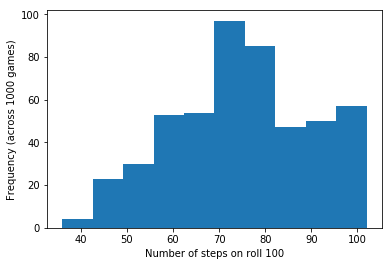

In [489]:
import matplotlib.pyplot as plt
plt.hist(results_sim_df.iloc[99,1:501])
plt.xlabel("Number of steps on roll 100")
plt.ylabel("Frequency (across 1000 games)")
plt.show()

Interestingly, we can see that most games finish somewhere above 60. Lets look at the time series for the first 5 games. 

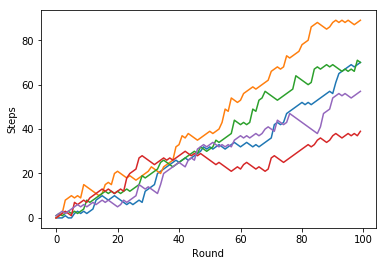

In [490]:
for game in range(5) :
    plt.plot(results_sim_df.loc[:,"round"], results_sim_df.loc[:, ( "game " + str(game) )])
    plt.xlabel("Round")
    plt.ylabel("Steps")
plt.show()

Finally, to answer our question, we need to calculate the proportion of games in which the player reached the 60th step or above by the last round. Our esimate of the probability is simply the proportion of games in which this outcome occured. 

In [497]:
print(sum(results_sim_df.iloc[99,1:501] >= 60) / 500)


0.818
